In [1]:
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import pandas as pd
import keras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../full_dataset.csv")
data = data.sample(frac=1)
data.head()

,Questions,Answers,Category,Sentiment
69865,type paper produc machin like fourdrini,wove paper,squad,1.0
6479,call inhabit london,Arabs,humor,4.0
104849,inner citi look like,The inner city has largely retained its Mediev...,squad,2.0
57395,first time liszt chopin perform togeth,2 April 1833,squad,1.0
111965,year interest renew rule law within gener assembl,2006,squad,3.0


In [3]:
model = keras.models.load_model(
    'final_model')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142799 entries, 136667 to 65598
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Questions  142799 non-null  object 
 1   Answers    142799 non-null  object 
 2   Category   142799 non-null  object 
 3   Sentiment  142799 non-null  float64
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


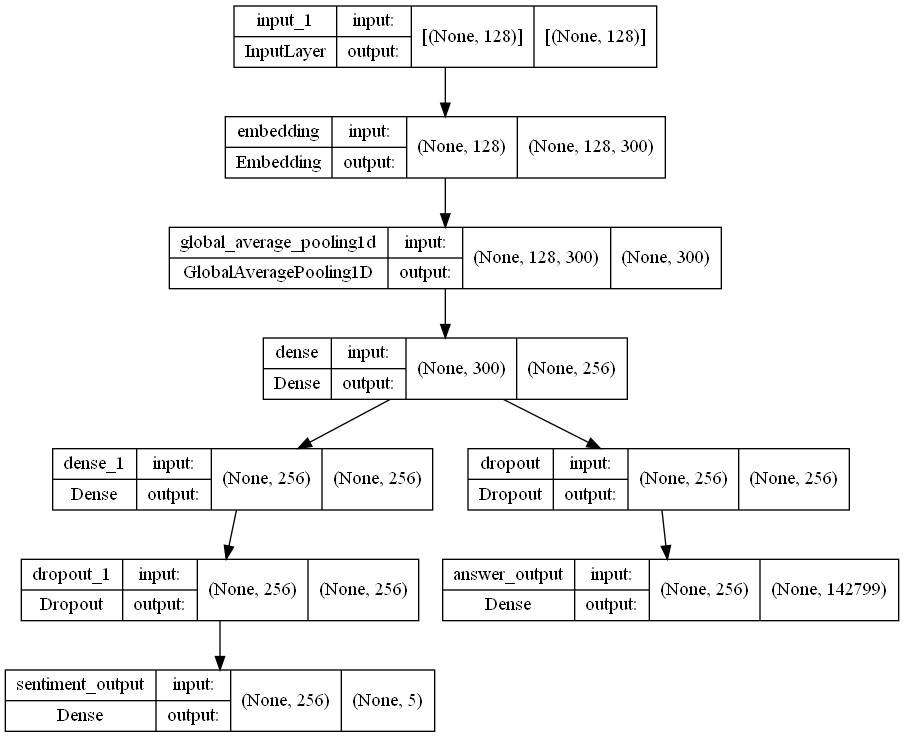

In [4]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
data.groupby(['Sentiment'])['Sentiment'].count().reset_index(name='count')

,Sentiment,count
0,1.0,28560
1,2.0,28560
2,3.0,28559
3,4.0,28560
4,5.0,28560


In [9]:
df2 = data.groupby(['Category'])['Category'].count().reset_index(name='count')
df2.head(200)

,Category,count
0,artificial intelligence,50
1,chit-chat,7032
2,computers,8
3,covid,117
4,emotion,41
5,food,11
6,gossip,5
7,greetings,9
8,health,1
9,history,8


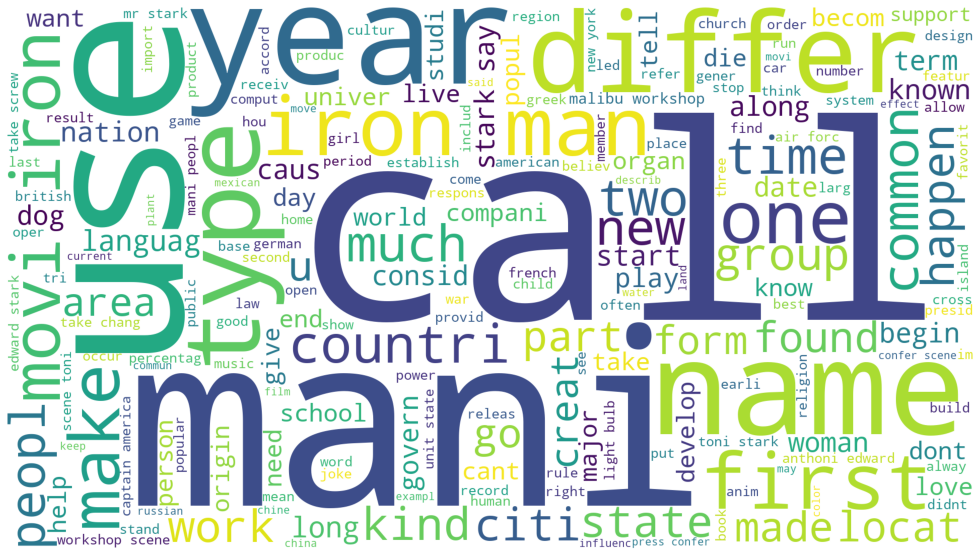

In [10]:
text = data['Questions'].values  

wordcloud = WordCloud(width=1920, height=1080, background_color="white").generate(str(" ".join(text)))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

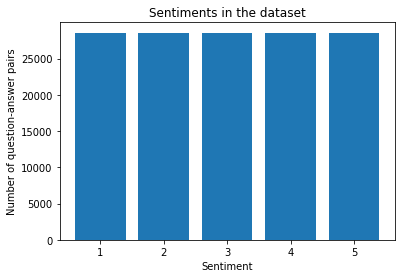

In [12]:
df2 = data.groupby(['Sentiment'])['Sentiment'].count().reset_index(name='count')
df2.head(200)
plt.bar(df2['Sentiment'], df2['count'])
plt.title('Sentiments in the dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of question-answer pairs')
plt.show()